Importing the Dependecies


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [50]:
#loading dataset to dataframe
loan_dataset = pd.read_csv('./Loan_Details_Dataset.csv')

In [51]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [52]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [53]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [54]:
# stats of dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
# count no of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
#droping all the missing values
loan_dataset = loan_dataset.dropna()
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
loan_dataset.shape

(480, 13)

In [58]:
#label encoding if N then 0 and Y then 1
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [59]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [60]:
# Dependensts column values
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [61]:
# Gender Counts
loan_dataset["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [62]:
#Replacing 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [63]:
loan_dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [86]:
loan_dataset.to_csv('Loan_Dataset_with_Labelling.csv')

In [106]:
loan_dataset.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [107]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].astype(int)

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

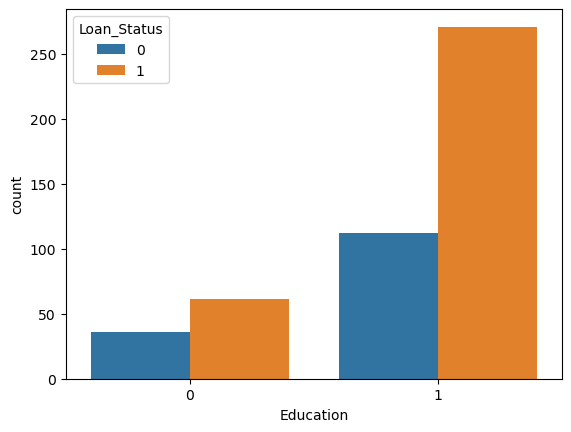

In [108]:
# education vs loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

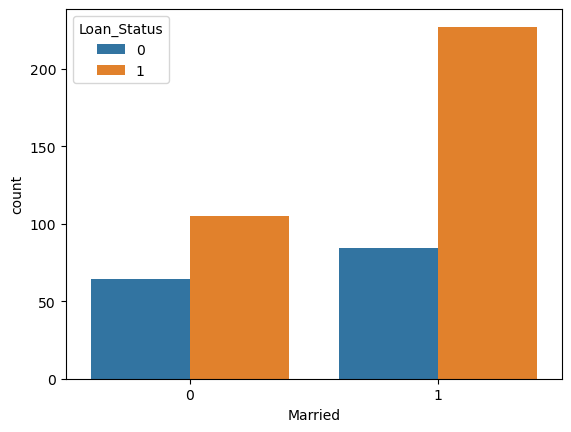

In [109]:
# marital statis vs loan_status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

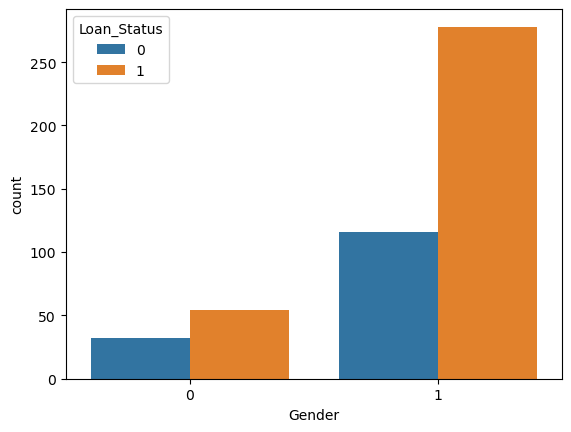

In [110]:
# gender vs loan_status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

In [111]:
# convert categorical values to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},
                                     'Gender':{'Male':1,'Female':0},
                                     'Self_Employed':{'No':0,'Yes':1},
                                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                                     'Education':{'Graduate':1,'Not Graduate':0}
                                    },inplace=True)

In [112]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [113]:
# separating data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1) # if remove column axis=1 , if row axis=0
Y = loan_dataset['Loan_Status']
# X=Data, Y=Label

In [114]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

 Split data into train data and test data

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)


In [116]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [130]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
368,1,1,1,1,0,6325,0.0,175.0,360.0,1.0,1
74,1,1,4,1,1,5266,1774.0,187.0,360.0,1.0,1
135,1,1,4,1,0,4000,7750.0,290.0,360.0,1.0,1
53,1,1,2,1,0,4616,0.0,134.0,360.0,1.0,2
96,0,1,0,1,0,2484,2302.0,137.0,360.0,1.0,1


Training the model

Model used : Support Vector Machine Model


In [117]:
classifier = svm.SVC(kernel='linear')

In [118]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [119]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [120]:
print('Accuracy of training data : ', training_data_accuracy)

Accuracy of training data :  0.7893518518518519


In [121]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_prediction = accuracy_score(X_test_prediction,Y_test)

In [122]:
print('Accuracy of test data : ', test_data_prediction)

Accuracy of test data :  0.8333333333333334


## Prepare a Predictive System

In [ ]:
#0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1 - loan rejected input

#0,1,0,1,0,3166,0.0,36.0,360.0,1.0,1 - loan approved input

In [186]:
input_data = (1,1,1,1,0,2787,1917.0,146.0,360.0,0.0,0)

#input_data_features = pd.DataFrame([input_data], columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)

print(prediction)

if (prediction[0]== 1):
    print('Loan Approved')
else:
    print('Loan Rejected')


[0]
Loan Rejected


/Users/nishanthreddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
